<a href="https://colab.research.google.com/github/yuliiabosher/Fiber-optic-project/blob/europe_stats_analysis/UKPredictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Code snippets to predict progress and show data

In [1]:
#############
###########PREDICT PROGRESS################
#####There are two functions:
#fn_predict_five_year
#fn_predict_three_year


#The first function takes in five year values and calculates a line of best fit
#assuming they represent % availaibility values over a 5 year period. You also need to specify the start year and
#whether you want it to calculate the year availability will reach 100% OR the value for a given future year

#The second function is as above, but only takes three yearly values

#For both functions:
#where input parameter yearOrValueFlag = 0 it will return the year at which availability = 100%
#where  input parameter yearOrValueFlag > 0, it will return the predicted availability percentage at time startyear + yearOrValueFlag
#so if startyear = 2018 and you want to know what the value will be in 2025, set yearOrValueFlag to 7,

def fn_predict_five_year(year1Value, year2Value, year3Value, year4Value, year5Value, startyear, yearOrValueFlag):
  import math
  # define two arrays to hold the years and the corresponding values
  year = np.array([1,2,3,4,5])
  value = np.array([year1Value,year2Value,year3Value,year4Value,year5Value])

  # find line equation, beta1 (coefficient) and beta0 (y-intercept)
  beta1, beta0 = np.polyfit(year, value, 1)

  if yearOrValueFlag == 0:
    #find year for a 100% coverage
    y_value = 100
    x_year = 0


    x_year = (y_value - beta0)/beta1

    #the year value should be rounded up
    thisyear = math.ceil(x_year) + startyear
    return thisyear
  else:
    #find coverage where year = yearOrValueFlag
    y_value = 0
    x_year = yearOrValueFlag

    y_value = beta0 + beta1*x_year

    return y_value

def fn_predict_three_year(year1Value, year2Value, year3Value, startyear, yearOrValueFlag):
  import math
  # define two arrays to hold the years and the corresponding values
  year = np.array([1,2,3])
  value = np.array([year1Value,year2Value,year3Value])

  # find line equation, beta1 (coefficient) and beta0 (y-intercept)
  beta1, beta0 = np.polyfit(year, value, 1)

  if yearOrValueFlag == 0:
    #find year for a 100% coverage
    y_value = 100
    x_year = 0


    x_year = (y_value - beta0)/beta1

    #the year value should be rounded up
    thisyear = math.ceil(x_year) + startyear
    return thisyear
  else:
    #find coverage where year = yearOrValueFlag
    y_value = 0
    x_year = yearOrValueFlag

    y_value = beta0 + beta1*x_year

    return y_value



### show parliamentary constituencies predicted to have less than 50% availability by 2030

<ipython-input-2-6e276884eeea>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofcom_full_fibre_df['parliamentary_constituency_name'] = ofcom_full_fibre_df['parliamentary_constituency_name'].str.upper().str.strip()
<ipython-input-2-6e276884eeea>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofcom_full_fibre_df['parliamentary_constituency_name'] = ofcom_full_fibre_df['parliamentary_constituency_name'].str.upper().str.strip()
<ipython-input-2-6e276884eeea>:23: SettingWithCopyWarning: 
A value is trying 

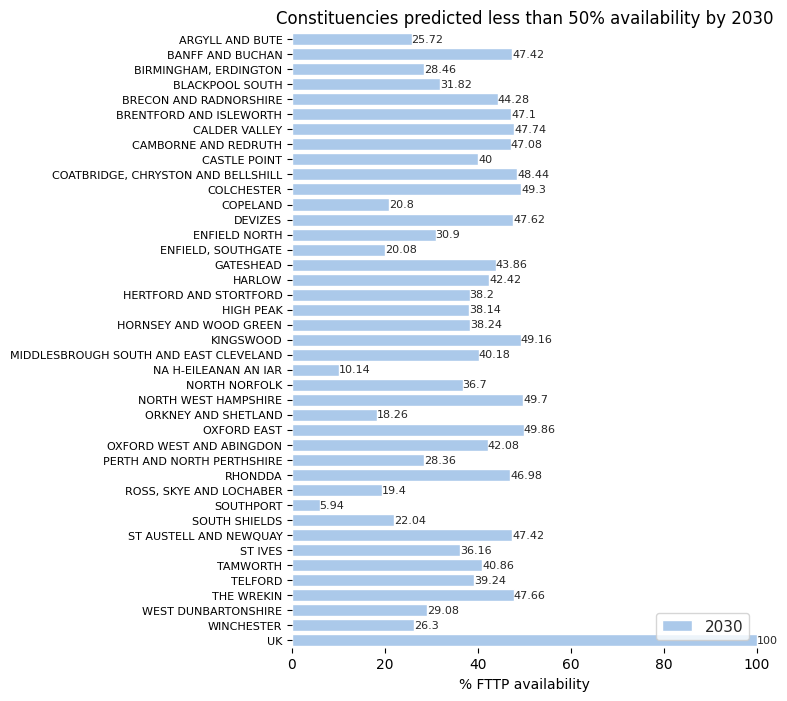

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#####################################################################################
###################################################################################
##Load parliamentary data, calculate predicted avail values for each constituency until 2030
##create a bar chart showing constituencies that are predicted to have less than 50% avail by 2030
def clean_and_load_parldf(link_to_file, year):
    ofcom_df = pd.read_csv(link_to_file, encoding="latin")

    #display(ofcom_df.head())
  #display(ofcom_df.columns)
    #if year == 2024:
     #   ofcom_pc_codes_df = ofcom_df[['parliamentary_constituency_name', 'parl_const']]


    ofcom_full_fibre_df = ofcom_df[['parliamentary_constituency_name','Full Fibre availability (% premises)']]
    if ofcom_full_fibre_df['parliamentary_constituency_name'].str.contains('YNYS MÃ”N').any():
        index = ofcom_full_fibre_df[ofcom_full_fibre_df['parliamentary_constituency_name'].str.contains('YNYS MÃ”N')].index[0]
        ofcom_full_fibre_df.loc[index,'parliamentary_constituency_name'] = 'YNYS MÔN'
    #display(ofcom_full_fibre_df[ofcom_full_fibre_df['parliamentary_constituency_name'].str.contains('YNYS')])
    ofcom_full_fibre_df['parliamentary_constituency_name'] = ofcom_full_fibre_df['parliamentary_constituency_name'].str.upper().str.strip()
    #display(ofcom_full_fibre_df.head())

    return ofcom_full_fibre_df


df2023 = clean_and_load_parldf("https://raw.githubusercontent.com/yuliiabosher/Fiber-optic-project/refs/heads/parliamentary-constituencies/202401_fixed_pcon_coverage_r01.csv", \
2024)
df2022 = clean_and_load_parldf("https://raw.githubusercontent.com/yuliiabosher/Fiber-optic-project/refs/heads/parliamentary-constituencies/202209_fixed_pcon_coverage_r02.csv", \
2022)
df2021 = clean_and_load_parldf("https://raw.githubusercontent.com/yuliiabosher/Fiber-optic-project/refs/heads/parliamentary-constituencies/202109_fixed_pcon_coverage_r01.csv", \
2021)
df2020 = clean_and_load_parldf("https://raw.githubusercontent.com/yuliiabosher/Fiber-optic-project/refs/heads/parliamentary-constituencies/202009_fixed_pcon_coverage_r01.csv", \
2020)
df2019 = clean_and_load_parldf("https://raw.githubusercontent.com/yuliiabosher/Fiber-optic-project/refs/heads/parliamentary-constituencies/201909_fixed_pcon_coverage_r01.csv", \
2019)
#df2018 = clean_and_load_parldf("https://raw.githubusercontent.com/yuliiabosher/Fiber-optic-project/refs/heads/parliamentary-constituencies/201809_fixed_pcon_coverage_r01.csv", \
#2018)
#df2023['year']=2023
#df2022['year']=2022
#df2021['year']=2021
#df2020['year']=2020
#df2019['year']=2019
#populate the dataframe that will hold the countries
linktofile = "https://raw.githubusercontent.com/yuliiabosher/Fiber-optic-project/refs/heads/parliamentary-constituencies/202401_fixed_pcon_coverage_r01.csv"
ofcom_df = pd.read_csv(linktofile, encoding="latin")
ofcom_pc_codes_df = ofcom_df[['parliamentary_constituency_name', 'parl_const']]
ofcom_pc_codes_df['country'] = ofcom_pc_codes_df['parl_const']
ofcom_pc_codes_df.loc[ofcom_pc_codes_df['parl_const'].str.contains('E'), 'country'] = 'England'
ofcom_pc_codes_df.loc[ofcom_pc_codes_df['parl_const'].str.contains('W'), 'country'] = 'Wales'
ofcom_pc_codes_df.loc[ofcom_pc_codes_df['parl_const'].str.contains('S'), 'country'] = 'Scotland'
ofcom_pc_codes_df.loc[ofcom_pc_codes_df['parl_const'].str.contains('N'), 'country'] = 'Northern Ireland'
ofcom_pc_codes_df.drop(['parl_const'], axis=1, inplace=True)

#rename the value cols
df2023.rename(columns={"Full Fibre availability (% premises)": "FTTP2023"}, inplace=True)
df2022.rename(columns={"Full Fibre availability (% premises)": "FTTP2022"}, inplace=True)
df2021.rename(columns={"Full Fibre availability (% premises)": "FTTP2021"}, inplace=True)
df2020.rename(columns={"Full Fibre availability (% premises)": "FTTP2020"}, inplace=True)
df2019.rename(columns={"Full Fibre availability (% premises)": "FTTP2019"}, inplace=True)

#df_final = pd.concat([df2019,df2020,df2021,df2022,df2023])
#df_final.sort_values('parliamentary_constituency_name', inplace=True)
#df_final.head(100)

df_once = df2019.merge(df2020, on=['parliamentary_constituency_name'],how='inner')
df_again = df_once.merge(df2021, on=['parliamentary_constituency_name'],how='inner')
df_andagain =  df_again.merge(df2022, on=['parliamentary_constituency_name'],how='inner')
df_onemoretime =  df_andagain.merge(df2023, on=['parliamentary_constituency_name'],how='inner')
df_final = df_onemoretime.merge(ofcom_pc_codes_df, on=['parliamentary_constituency_name'],how='inner')
df_final.head(652)

vals2024= []
vals2025=[]
vals2026=[]
vals100=[]
vals2027= []
vals2028=[]
vals2029=[]
vals2030=[]
for _,row in df_final.iterrows():
    thisval2024 = fn_predict_five_year(row['FTTP2019'], row['FTTP2020'], row['FTTP2021'], row['FTTP2022'], row['FTTP2023'], 2019, 5)
    vals2024.append(thisval2024)
    thisval2025 = fn_predict_five_year(row['FTTP2019'], row['FTTP2020'], row['FTTP2021'], row['FTTP2022'], row['FTTP2023'], 2019, 6)
    vals2025.append(thisval2025)
    thisval2026 = fn_predict_five_year(row['FTTP2019'], row['FTTP2020'], row['FTTP2021'], row['FTTP2022'], row['FTTP2023'], 2019, 7)
    vals2026.append(thisval2026)
    thisval2027 = fn_predict_five_year(row['FTTP2019'], row['FTTP2020'], row['FTTP2021'], row['FTTP2022'], row['FTTP2023'], 2019, 8)
    vals2027.append(thisval2027)
    thisval2028 = fn_predict_five_year(row['FTTP2019'], row['FTTP2020'], row['FTTP2021'], row['FTTP2022'], row['FTTP2023'], 2019, 9)
    vals2028.append(thisval2028)
    thisval2029 = fn_predict_five_year(row['FTTP2019'], row['FTTP2020'], row['FTTP2021'], row['FTTP2022'], row['FTTP2023'], 2019, 10)
    vals2029.append(thisval2029)
    thisval2030 = fn_predict_five_year(row['FTTP2019'], row['FTTP2020'], row['FTTP2021'], row['FTTP2022'], row['FTTP2023'], 2019, 11)
    vals2030.append(thisval2030)
    thisval100 = fn_predict_five_year(row['FTTP2019'], row['FTTP2020'], row['FTTP2021'], row['FTTP2022'], row['FTTP2023'], 2019, 0)
    vals100.append(thisval100)


df_final['FTTP2024'] = vals2024
df_final['FTTP2025'] = vals2025
df_final['FTTP2026'] = vals2026
df_final['FTTP2027'] = vals2027
df_final['FTTP2028'] = vals2028
df_final['FTTP2029'] = vals2029
df_final['FTTP2030'] = vals2030
df_final['100% Year'] = vals100
pd.set_option('display.max_rows', 100)

df_final['FTTP2030'] = df_final['FTTP2030'].astype(float)
#display(df_final.head(100))
df_lessthan50=df_final.query('FTTP2030 < 50')

new_row = {'parliamentary_constituency_name': 'UK', 'FTTP2030': 100}
dflessthan50andUK = df_lessthan50._append(new_row, ignore_index=True)

df_lessthan50.sort_values(['country','FTTP2030'], ascending=True, inplace=True)

#display(dflessthan50andUK.head(100))
f, ax = plt.subplots(figsize=(6, 8))
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
ax = sns.barplot(x='FTTP2030', y='parliamentary_constituency_name', label="2030", color="b",
             data=dflessthan50andUK )
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 100), ylabel="",
       xlabel="% FTTP availability")
ax.bar_label(ax.containers[0], fontsize=8);
ax.set_title("Constituencies predicted less than 50% availability by 2030")
#plt.xlabel("% FTTP availability", fontsize=10)
#plt.ylabel("", fontsize=10)
sns.despine(left=True, bottom=True)
ax.yaxis.set_tick_params(labelsize = 8)
#ax.set_xticklabels(['2024','2025','2026','2027','2028','2029','2030'])
#plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
#plt.xlabel('Year')
#plt.ylabel('Predicted % avail')







## using data above, calculate predicted avail values for each constituency until 2030
##
## group by country, then show each countries predicted avail up til  2030

,country,FTTP2023,FTTP2022,FTTP2021,FTTP2020,FTTP2019
0,England,60.373496,39.535714,25.274624,15.753195,9.547932
1,Northern Ireland,91.000000,83.555556,69.005556,53.277778,28.838889
2,Scotland,55.118644,37.779661,25.296610,15.547458,7.511864
3,Wales,59.448718,38.223077,26.297436,17.771795,11.238462


,country,variable,value
0,England,FTTP2024,55.183722
1,Northern Ireland,FTTP2024,96.055556
2,Scotland,FTTP2024,51.740000
3,Wales,FTTP2024,53.970256
4,England,FTTP2025,67.727086
5,Northern Ireland,FTTP2025,100.000000
6,Scotland,FTTP2025,63.484576
7,Wales,FTTP2025,65.657436
8,England,FTTP2026,80.270451
9,Northern Ireland,FTTP2026,100.000000


<ipython-input-3-016b073c8461>:71: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['2024','2025','2026','2027','2028','2029','2030'])


Text(0, 0.5, 'Predicted % avail')

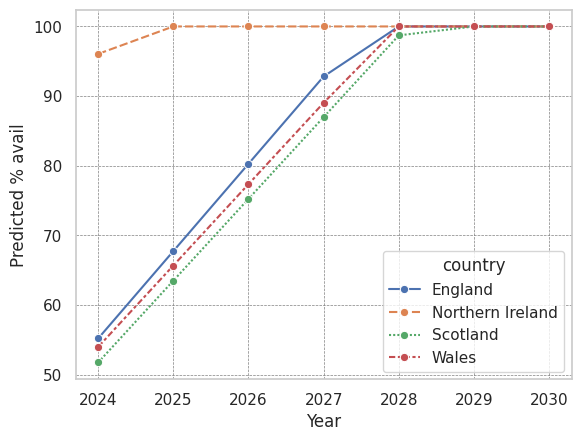

In [3]:
#####################################################################################
###################################################################################
##using data above, calculate predicted avail values for each constituency until 2030
##
#group by country, then show each countries predicted avail up ti  2030
#df_grouped = df_final.groupby('country', 'FTTP2019'.mean)
df_interim = df_final[['country', 'FTTP2023','FTTP2022','FTTP2021','FTTP2020','FTTP2019']]
#df_grouped_uk = df_final[['FTTP2023','FTTP2022','FTTP2021','FTTP2020','FTTP2019']].mean()
#df_grouped_uk = df_final['FTTP2019'].mean()
#df_grouped_uk['country'] = 'UK'
#display(df_grouped_uk.head())
df_grouped = df_interim.groupby('country',as_index=False).mean()
#df_grouped = pd.concat([df_grouped_country, df_grouped_uk])
display(df_grouped.head(100))
vals2024= []
vals2025=[]
vals2026=[]
vals2027= []
vals2028=[]
vals2029=[]
vals2030=[]
vals100=[]
for _,row in df_grouped.iterrows():
    thisval2024 = fn_predict_five_year(row['FTTP2019'], row['FTTP2020'], row['FTTP2021'], row['FTTP2022'], row['FTTP2023'], 2019, 5)
    vals2024.append(thisval2024)
    thisval2025 = fn_predict_five_year(row['FTTP2019'], row['FTTP2020'], row['FTTP2021'], row['FTTP2022'], row['FTTP2023'], 2019, 6)
    vals2025.append(thisval2025)
    thisval2026 = fn_predict_five_year(row['FTTP2019'], row['FTTP2020'], row['FTTP2021'], row['FTTP2022'], row['FTTP2023'], 2019, 7)
    vals2026.append(thisval2026)
    thisval2027 = fn_predict_five_year(row['FTTP2019'], row['FTTP2020'], row['FTTP2021'], row['FTTP2022'], row['FTTP2023'], 2019, 8)
    vals2027.append(thisval2027)
    thisval2028 = fn_predict_five_year(row['FTTP2019'], row['FTTP2020'], row['FTTP2021'], row['FTTP2022'], row['FTTP2023'], 2019, 9)
    vals2028.append(thisval2028)
    thisval2029 = fn_predict_five_year(row['FTTP2019'], row['FTTP2020'], row['FTTP2021'], row['FTTP2022'], row['FTTP2023'], 2019, 10)
    vals2029.append(thisval2029)
    thisval2030 = fn_predict_five_year(row['FTTP2019'], row['FTTP2020'], row['FTTP2021'], row['FTTP2022'], row['FTTP2023'], 2019, 11)
    vals2030.append(thisval2030)
    #thisval100 = fn_predict_five_year(row['FTTP2019'], row['FTTP2020'], row['FTTP2021'], row['FTTP2022'], row['FTTP2023'], 2019, 0)
    #vals100.append(thisval100)
df_grouped['FTTP2024'] = vals2024
df_grouped['FTTP2025'] = vals2025
df_grouped['FTTP2026'] = vals2026
df_grouped['FTTP2027'] = vals2027
df_grouped['FTTP2028'] = vals2028
df_grouped['FTTP2029'] = vals2029
df_grouped['FTTP2030'] = vals2030

#df_grouped['100% Year'] = vals100
df_grouped.head()
#drop anything before 2024
df_grouped.drop(['FTTP2019'], axis=1, inplace=True)
df_grouped.drop(['FTTP2020'], axis=1, inplace=True)
df_grouped.drop(['FTTP2021'], axis=1, inplace=True)
df_grouped.drop(['FTTP2022'], axis=1, inplace=True)
df_grouped.drop(['FTTP2023'], axis=1, inplace=True)

percent_cols = ['FTTP2024','FTTP2025',
       'FTTP2026',
       'FTTP2027',
       'FTTP2028','FTTP2029', 'FTTP2030']
meltedData=df_grouped.melt(id_vars=["country"],value_vars=percent_cols)

meltedData['value'] = np.where(meltedData['value'] > 100, 100, meltedData['value'])
display(meltedData)
#meltedData.plot(x='variable',y='value')
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
ax = sns.lineplot(x='variable', y='value', hue='country', style='country',marker = 'o', color='b',# deep, muted, bright, pastel, dark, colorblind
             data=meltedData, )

ax.set_xticklabels(['2024','2025','2026','2027','2028','2029','2030'])
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.xlabel('Year')
plt.ylabel('Predicted % avail')

## using data above, create map as of 2030

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


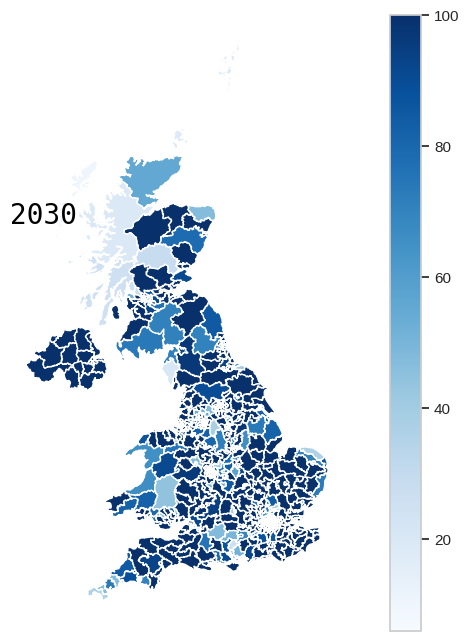

In [4]:
##################################################
##Code to predict data for UK parl const til 2030 and
##load result for 2030 as a map
#############################################
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

constituencies = gpd.read_file('https://github.com/yuliiabosher/Fiber-optic-project/raw/refs/heads/parliamentary-constituencies/Westminster_Parliamentary_Constituencies_Dec_2021_UK_BUC_2022_-8882165546947265805.zip')
#display(constituencies.head(650))

constituencies_cleaned = constituencies[['PCON21CD', 'PCON21NM', 'geometry']]
constituencies_cleaned['PCON21NM'] = constituencies_cleaned['PCON21NM'].str.upper().str.strip()
#display(constituencies_cleaned.head())

#display(f'Number of rows in the geodataframe of the UK constituencies - {len(constituencies_cleaned)}')
#display(f'Number of rows in the Ofcom dataframe on Fill Fibre availability by constituency - {len(df_final)}')
fibre_by_constituency_geo_df = constituencies_cleaned.merge(df_final, left_on='PCON21NM', right_on='parliamentary_constituency_name')
#display(fibre_by_constituency_geo_df.head(652))
#display(f'The legth of the merged dataframe is {len(fibre_by_constituency_geo_df)}')
fibre_by_constituency_geo_df.drop('PCON21NM', axis=1, inplace=True)
#display(fibre_by_constituency_geo_df.head())
#fibre_by_constituency_geo_df.columns = ['parliamentary_constituency_name', 'geometry',  'FTTP2030']
fibre_by_constituency_geo_df['FTTP2030'] = np.where(fibre_by_constituency_geo_df['FTTP2030'] > 100, 100, fibre_by_constituency_geo_df['FTTP2030'])
fig, ax = plt.subplots(1, 1)
fibre_by_constituency_geo_df.plot(column='FTTP2030', cmap='Blues', ax=ax, legend=True)
fig.set_size_inches(12,8)
plt.style.use('seaborn-v0_8-whitegrid')
font = {'family':'monospace','color':'black','size':20}
ax.set_title(2030, fontdict = font, pad=-150, loc='left')
plt.axis('off')
plt.show()




